## **Problem Statement**  

This project seeks to build a Neural Machine learning model that can estimate the probability of students' performance by analyzing their current academic results.

## **Features of The Dataset**  

**user_id**: Unique identifier for each Student  

**CourseCategory**: Type of the Course

**TimeSpentOnCourse**:  Number of times each student spend on a course

**NumberOfVideosWatched**:  Number of times each student spend on a video course

**NumberOfQuizzesTaken**: Number of Quizzes Taken

**QuizScores**:  Score of the Quiz

**CompletionRate**:  Completion Rate

**DeviceType**:  Type of Device

**CourseCompletion**: Students able to complete the course.  
1: Represents a Completed  
0: Represent not completed

### Importing my Liberies

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Data Set
data = pd.read_csv('online_course_engagement_data.csv')
data.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [29]:
data['CourseCompletion'] = data['CourseCompletion'].map({1: 'Completed', 0:'Not Completed'})

In [30]:
data.tail()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,Not Completed
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,Not Completed
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,Not Completed
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,Completed
8999,5595,Health,93.589781,7,5,56.274546,11.299071,0,Not Completed


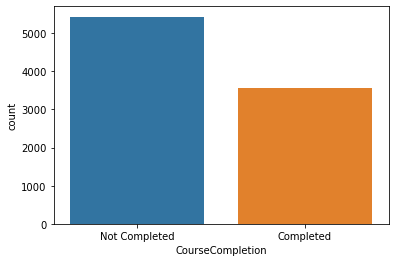

In [31]:
sns.countplot(x = 'CourseCompletion', data = data)
plt.show()

#### Observation
We have less student that completed the course

#### making a visual of the highest course categories

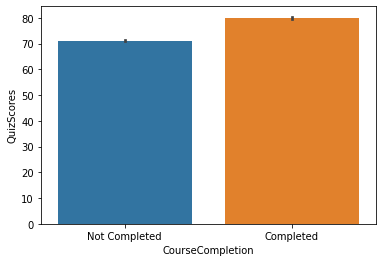

In [34]:
sns.barplot(x = 'CourseCompletion', y = 'QuizScores', data = data)
plt.show()

#### Observation
Regardless that they are less students that has completed the course, the total quiz score of the less student that has completed the course is bigger than the student that has not completed the course.

In [4]:
data['CourseCategory'].value_counts()

Business       1837
Health         1821
Science        1814
Programming    1810
Arts           1718
Name: CourseCategory, dtype: int64

#### The UserID does not give me any information, so drop it
Note that, What i'm trying to predict is the depencent variable which is the CourseComppletion

In [5]:
data['CourseCompletion'].value_counts()

0    5432
1    3568
Name: CourseCompletion, dtype: int64

#### Checking if there is an outlier 

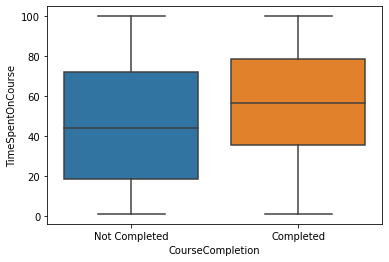

In [35]:
sns.boxplot(x = 'CourseCompletion', y = 'TimeSpentOnCourse', data = data)
plt.show()

#### Observation
There is no outlier in the number of student that completed the course

In [36]:
data['CourseCompletion'] = data['CourseCompletion'].map({'Completed': 1, 'Not Completed': 0})

In [37]:
data.head(2)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [39]:
data.isna().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [40]:
# Droping Duplicates
data.drop_duplicates(inplace = True)

### Splitting my Data Set

In [41]:
X = data.drop(columns = ['UserID', 'CourseCompletion'])
y = data['CourseCompletion']

### Encoding

In [42]:
# Encoding the Categorical Variable
X = pd.get_dummies(X, columns =['CourseCategory'], drop_first = True)
X.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
0,29.979719,17,3,50.365656,20.860773,1,0,1,0,0
1,27.802640,1,5,62.615970,65.632415,1,0,0,0,0
2,86.820485,14,2,78.458962,63.812007,1,0,0,0,0
3,35.038427,17,10,59.198853,95.433162,0,0,0,0,1
4,92.490647,16,0,98.428285,18.102478,0,0,0,1,0


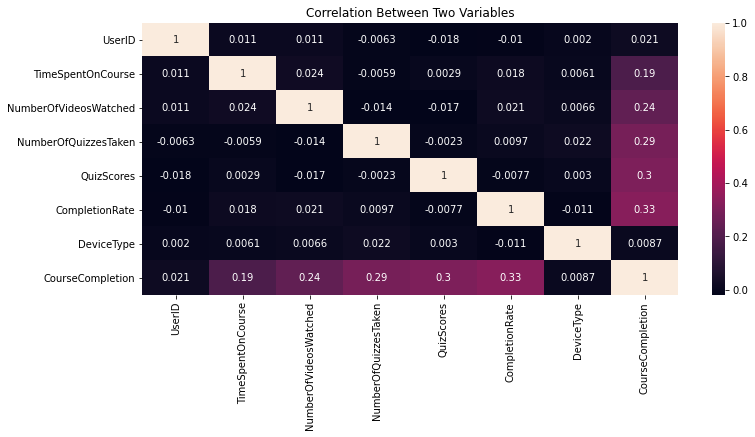

In [43]:
# Checking the Correlation between two variables
correlation = data.corr()
plt.figure(figsize = (12, 5))
sns.heatmap(correlation, annot = True)
plt.title('Correlation Between Two Variables')
plt.show()

### Splitting the Data into Train and Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### Building model using Neural Network
- Checking out for the best parameter using the Randomized Search Cv

In [45]:
# Neural Netwowrk
mlp = MLPClassifier(max_iter = 100, random_state = 42)

# Tuning the parameter
parameter_distribution = {'hidden_layer_sizes':[(50,50), (100,)],
                         'activation':['relu', 'tanh'],
                         'learning_rate':['constatnt', 'adaptive'],
                          'solver':['adam','sgd'],
                          'alpha':[0.000001, 0.5]
                         }

random_search = RandomizedSearchCV(estimator=mlp, param_distributions=parameter_distribution, cv=5, scoring='accuracy', n_jobs=-1)

# Training the Model
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=100, random_state=42),
                   n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [1e-06, 0.5],
                                        'hidden_layer_sizes': [(50, 50),
                                                               (100,)],
                                        'learning_rate': ['constatnt',
                                                          'adaptive'],
                                        'solver': ['adam', 'sgd']},
                   scoring='accuracy')

In [46]:
# Prediction
y_prediction = random_search.predict(X_test)
y_prediction

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [47]:
# Evaluation
evaluation = accuracy_score(y_test, y_prediction)
evaluation

0.8686910135412392

In [53]:
# Checking the Confusion Metrix
conf_matrix = confusion_matrix(y_prediction, y_prediction)
print(conf_matrix)

[[1455    0]
 [   0  982]]


In [48]:
# Picking out the Best Estimator
best_estimator = random_search.best_params_
best_estimator

{'solver': 'adam',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (100,),
 'alpha': 0.5,
 'activation': 'relu'}

### Visualization of the Best Accuracy

In [54]:
best_accuracy = MLPClassifier(activation = 'relu', alpha = 0.5, learning_rate = 'adaptive', solver = 'adam', hidden_layer_sizes = (100,))

In [55]:
max_epochs = 100
train_accuracy = []
test_accuracy = []
for epochs in range(max_epochs):
    best_accuracy.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, best_accuracy.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, best_accuracy.predict(X_test)))

Text(0.5, 1.0, 'Model Accuracy')

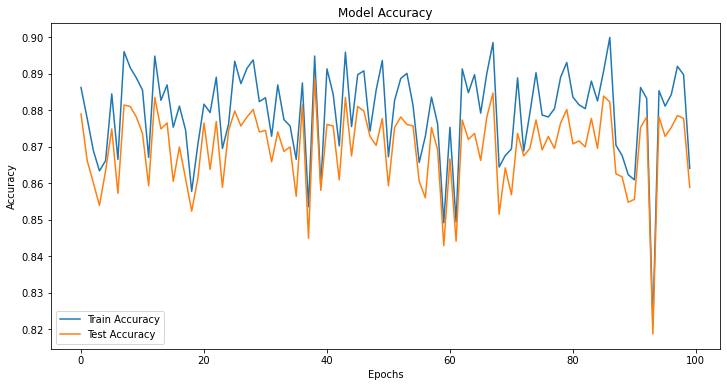

In [56]:
plt.figure(figsize = (12, 6))
plt.plot(range(max_epochs), train_accuracy, label = 'Train Accuracy')
plt.plot(range(max_epochs), test_accuracy, label = 'Test Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')